<a href="https://colab.research.google.com/github/VirtueZhao/Dive_into_Deep_Learning/blob/main/4_4_Model_Selection_Underfitting_and_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import d2l
import math
import torch
import numpy as np
from torch import nn

In [2]:
max_degree = 20
n_train, n_test =100, 100
true_w = np.zeros(max_degree)
print("True W: ", true_w)
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
print("True W: ", true_w)

features = np.random.normal(size=(n_train + n_test, 1))
# print("Features: ", features)
np.random.shuffle(features)
print("Features[0]: ", features[0])
poly_features = np.power(features, np.arange(max_degree).reshape(1,-1))
print("Poly_Feautres[0]: ",poly_features[0])
for i in range(max_degree):
  poly_features[:,i] /= math.gamma(i + 1)
print("Poly_Feautres[0]: ",poly_features[0])

labels = np.dot(poly_features, true_w)
# print("Labels: ", labels)
labels += np.random.normal(scale=0.1, size=labels.shape)

True W:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
True W:  [ 5.   1.2 -3.4  5.6  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0. ]
Features[0]:  [0.20950249]
Poly_Feautres[0]:  [1.00000000e+00 2.09502488e-01 4.38912924e-02 9.19533495e-03
 1.92644555e-03 4.03595135e-04 8.45541849e-05 1.77143121e-05
 3.71119245e-06 7.77504052e-07 1.62889033e-07 3.41256577e-08
 7.14941018e-09 1.49781922e-09 3.13796853e-10 6.57412213e-11
 1.37729494e-11 2.88546717e-12 6.04512550e-13 1.26646883e-13]
Poly_Feautres[0]:  [1.00000000e+00 2.09502488e-01 2.19456462e-02 1.53255583e-03
 8.02685645e-05 3.36329279e-06 1.17436368e-07 3.51474446e-09
 9.20434636e-11 2.14259273e-12 4.48878508e-14 8.54919675e-16
 1.49256499e-17 2.40535445e-19 3.59948387e-21 5.02733883e-23
 6.58274996e-25 8.11236760e-27 9.44200664e-29 1.04111783e-30]


In [3]:
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
  d2l.float32) for x in [true_w, features, poly_features, labels]]

In [4]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[0.2095],
         [0.2165]]),
 tensor([[1.0000e+00, 2.0950e-01, 2.1946e-02, 1.5326e-03, 8.0269e-05, 3.3633e-06,
          1.1744e-07, 3.5147e-09, 9.2043e-11, 2.1426e-12, 4.4888e-14, 8.5492e-16,
          1.4926e-17, 2.4054e-19, 3.5995e-21, 5.0273e-23, 6.5827e-25, 8.1124e-27,
          9.4420e-29, 1.0411e-30],
         [1.0000e+00, 2.1650e-01, 2.3437e-02, 1.6914e-03, 9.1547e-05, 3.9640e-06,
          1.4304e-07, 4.4240e-09, 1.1973e-10, 2.8801e-12, 6.2355e-14, 1.2273e-15,
          2.2142e-17, 3.6876e-19, 5.7027e-21, 8.2310e-23, 1.1138e-24, 1.4184e-26,
          1.7061e-28, 1.9441e-30]]),
 tensor([5.0968, 5.2789]))

In [25]:
def evaluate_loss(net, data_iter, loss):
  metric = d2l.Accumulator(2)
  for X, y in data_iter:
    out = net(X)
    y = y.reshape(out.shape)
    l = loss(out, y)
    metric.add(l.sum(), l.numel())
  return metric[0] / metric[1]

weight:  [[ 4.986563  1.191377 -3.401744  5.610178]]


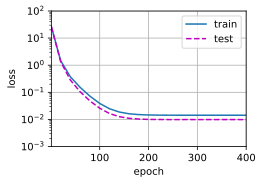

In [26]:
def train(train_features, test_features, train_labels, test_labels, num_epochs=400):
  loss = nn.MSELoss()
  input_shape = train_features.shape[-1]

  net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
  batch_size = min(10, train_labels.shape[0])
  train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
          batch_size)
  test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
          batch_size, is_train=False)
  trainer = torch.optim.SGD(net.parameters(), lr=0.01)
  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
          xlim=[1, num_epochs], ylim=[1e-3, 1e2],
          legend=['train', 'test'])
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, trainer)
    if epoch == 0 or (epoch + 1) % 20 == 0:
      animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                    evaluate_loss(net, test_iter, loss)))
  print("weight: ", net[0].weight.data.numpy())

train(poly_features[:n_train,:4], poly_features[n_train:,:4],
      labels[:n_train], labels[n_train:])

weight:  [[3.2096272 3.7947576]]


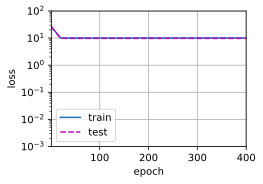

In [27]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

weight:  [[ 4.97883368e+00  1.29680657e+00 -3.34416294e+00  5.07916164e+00
  -1.54253080e-01  1.41769886e+00  3.49156782e-02  2.18702659e-01
   2.11103097e-01  3.44601721e-02 -1.63361564e-01 -7.87496045e-02
  -1.06365442e-01 -2.01264143e-01 -8.78228024e-02  1.18572995e-01
   1.17614001e-01 -5.05401986e-03 -5.69465347e-02 -1.03736170e-01]]


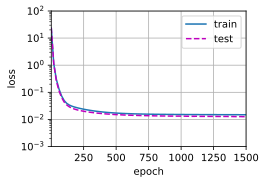

In [28]:
train(poly_features[:n_train,:], poly_features[n_train:,:],
      labels[:n_train], labels[n_train:], num_epochs=1500)